In [8]:
#@title **Installing libraries**
%%capture
! sudo apt update
! sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
%cd /opt
%rm -rf kmc.f90 kmc.exe
! curl -LJO https://raw.githubusercontent.com/emartineznunez/Kp/main/src/kmc.f90
! gfortran -o kmc.exe kmc.f90
! curl -LJO https://raw.githubusercontent.com/emartineznunez/Kp/main/src/kmc_p.f90
! gfortran -o kmc_p.exe kmc_p.f90
%cd /content
%rm -rf N2O4.dat
! curl -LJO https://raw.githubusercontent.com/emartineznunez/Kp/main/data/N2O4.dat
%env PATH="/content:.:/opt:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin"

### **Chemical Kinetics simulation**

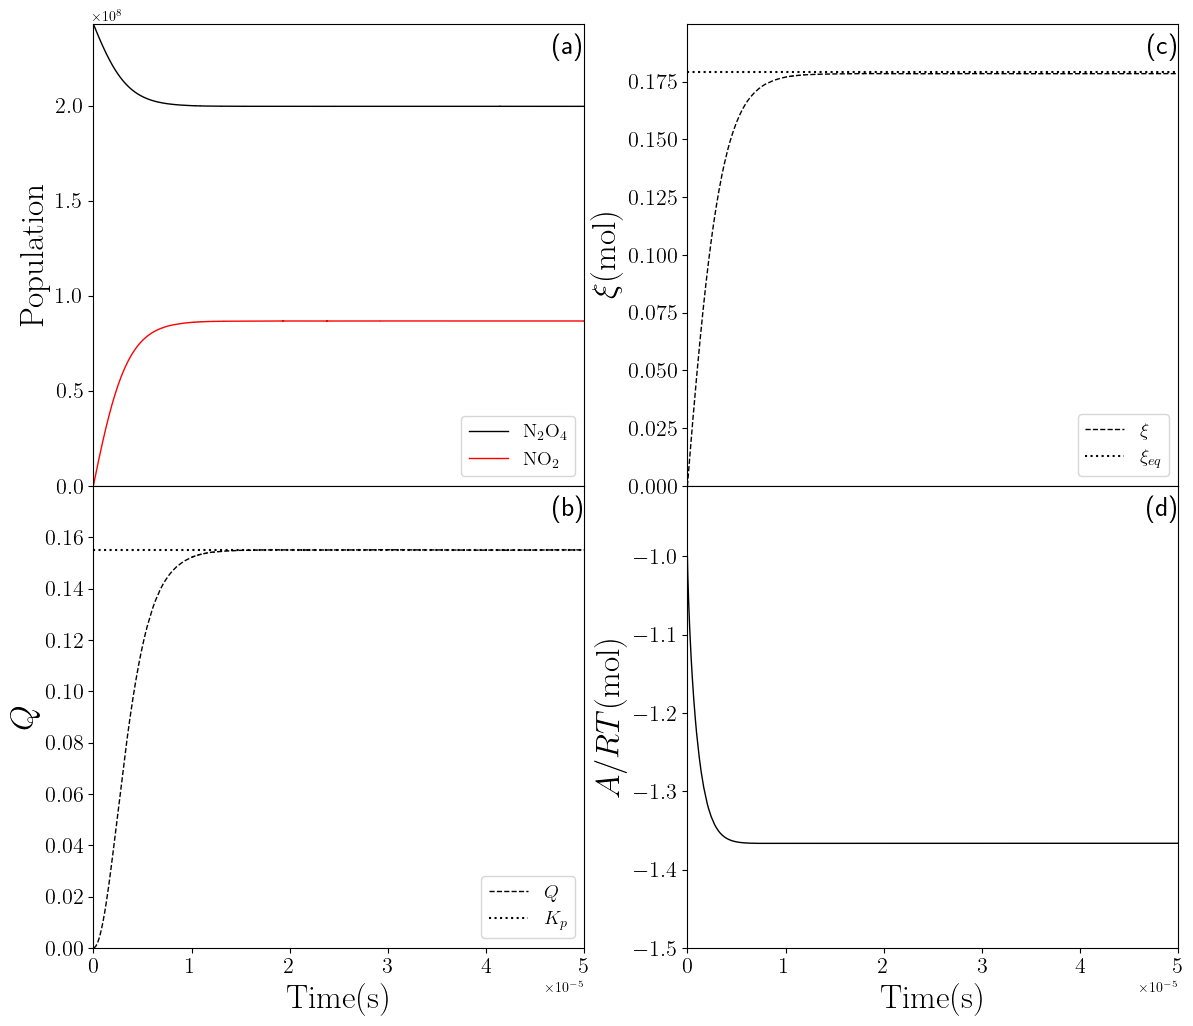

In [9]:
#@title Running the calculation at constant $V$
!kmc.exe<N2O4.dat>N2O4.out
! awk 'BEGIN{mol[1]=0;mol[2]=0; print "time, p1, p2"};/TIME/{t=$2;nm=0};/Molecules of/{++nm;mol[nm]=$4};/EQUILIBRIUM PRO/{print t,","mol[1],","mol[2]}' N2O4.out > KMC.csv
! awk 'BEGIN{print "time,kp,xi"};/TIME/{t=$2};/Kp/{getline; print t,",",$2,",",$3}' N2O4.out > kp.csv
! awk 'BEGIN{print "time,A"};/TIME/{t=$2};/Kp/{getline; print t,",",$6}' N2O4.out > A.csv

#! sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

data = pd.read_csv('KMC.csv')

x = data['time']
y1 = data[' p1']
y2 = data[' p2']


fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(14,12))
plt.subplots_adjust(wspace=0.21,hspace=0)

axs[0][0].plot(x,y1,color='black',label=r'$\mathrm{N_2O_4}$',linewidth=1.0)
axs[0][0].plot(x,y2,color='red',label=r'$\mathrm{NO_2}$',linewidth=1.0)
axs[0][0].set_ylabel(r'$\mathrm{Population}$',fontsize=24)
axs[0][0].set_xlim(0,max(x))
axs[0][0].set_ylim(0,max(data[' p1']))


data = pd.read_csv('kp.csv')

y1 = data['kp']
y2 = data['xi']
axs[1][0].plot(x,y1,'--',color='black',label=r'$Q$',linewidth=1.0)
axs[0][1].plot(x,y2,'--',color='black',label=r'$\xi$',linewidth=1.0)
axs[1][0].set_ylabel(r'$Q$',fontsize=24)


data = pd.read_csv('A.csv')
y = data['A']
axs[1][1].plot(x,y,'-',color='black',linewidth=1.0)
axs[1][1].set_ylabel(r'$A/RT \mathrm{(mol)}$',fontsize=24)
axs[1][1].set_xlabel(r'$\mathrm{Time (s)}$',fontsize=24)

axs[0][1].set_ylabel(r'$\xi \mathrm{(mol)}$',fontsize=24)
axs[1][0].set_xlabel(r'$\mathrm{Time (s)}$',fontsize=24)

axs[1][0].set_xlim(0,max(x))
axs[1][0].set_ylim(0,0.1799999)

axs[0][1].set_xlim(0,max(x))
axs[0][1].set_ylim(0,0.1999999)

axs[1][1].set_xlim(0,max(x))
axs[1][1].set_ylim(-1.5,-0.91)

axs[0][0].xaxis.set_tick_params(labelbottom=False)
axs[0][0].set_xticks([])



axs[0][1].xaxis.set_tick_params(labelbottom=False)
axs[0][1].set_xticks([])




axs[1][0].axhline(y=0.155,color='black', linestyle=':',label=r'$K_p$')

axs[0][1].axhline(y=0.179, color='black', linestyle=':',label=r'$\xi_{eq}$')
axs[0][0].legend(loc='lower right',fontsize=14)
axs[1][0].legend(loc='lower right',fontsize=14)
axs[0][1].legend(loc='lower right',fontsize=14)
axs[0][0].yaxis.set_tick_params(labelsize=16)
axs[1][0].yaxis.set_tick_params(labelsize=16)
axs[0][1].yaxis.set_tick_params(labelsize=16)
axs[0][1].xaxis.set_tick_params(labelsize=16)
axs[1][0].xaxis.set_tick_params(labelsize=16)

axs[1][1].yaxis.set_tick_params(labelsize=16)
axs[1][1].xaxis.set_tick_params(labelsize=16)


axs[0][0].text(0.97,0.95, '(a)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[1][0].text(0.97,0.95, '(b)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[0][1].text(0.97,0.95, '(c)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[1][1].text(0.97,0.95, '(d)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)


plt.savefig('Kp.svg',bbox_inches='tight')
plt.show()




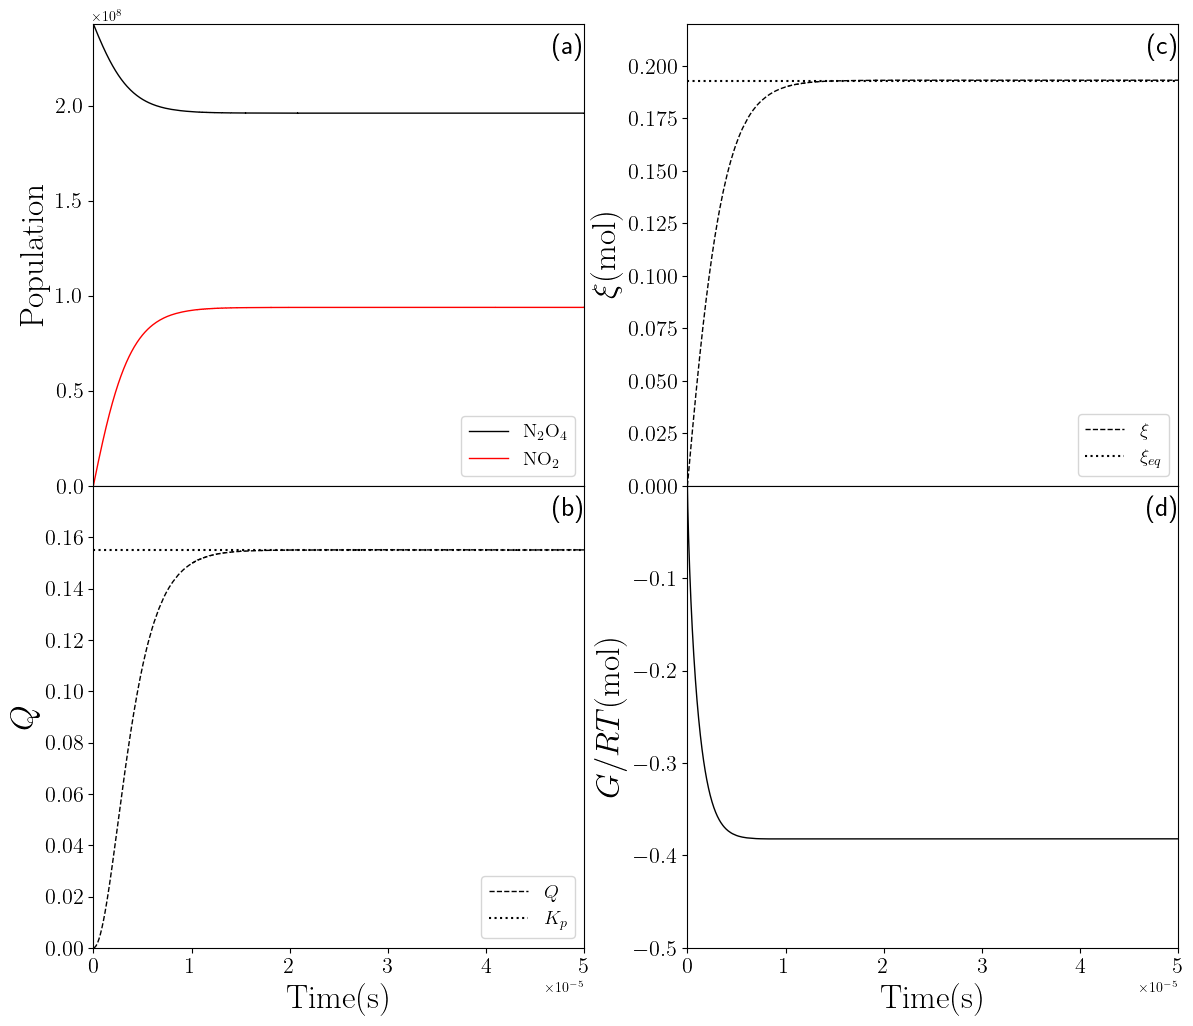

In [10]:
#@title Running the calculation at constant $p$
!kmc_p.exe<N2O4.dat>N2O4_p.out
! awk 'BEGIN{mol[1]=0;mol[2]=0; print "time, p1, p2"};/TIME/{t=$2;nm=0};/Molecules of/{++nm;mol[nm]=$4};/EQUILIBRIUM PRO/{print t,","mol[1],","mol[2]}' N2O4_p.out > KMC_p.csv
! awk 'BEGIN{print "time,kp,xi"};/TIME/{t=$2};/Kp/{getline; print t,",",$2,",",$3}' N2O4_p.out > kp_p.csv
! awk 'BEGIN{print "time,A"};/TIME/{t=$2};/Kp/{getline; print t,",",$6}' N2O4_p.out > G.csv

#! sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

data = pd.read_csv('KMC_p.csv')

x = data['time']
y1 = data[' p1']
y2 = data[' p2']


fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(14,12))
plt.subplots_adjust(wspace=0.21,hspace=0)

axs[0][0].plot(x,y1,color='black',label=r'$\mathrm{N_2O_4}$',linewidth=1.0)
axs[0][0].plot(x,y2,color='red',label=r'$\mathrm{NO_2}$',linewidth=1.0)
axs[0][0].set_ylabel(r'$\mathrm{Population}$',fontsize=24)
axs[0][0].set_xlim(0,max(x))
axs[0][0].set_ylim(0,max(data[' p1']))


data = pd.read_csv('kp_p.csv')

y1 = data['kp']
y2 = data['xi']
axs[1][0].plot(x,y1,'--',color='black',label=r'$Q$',linewidth=1.0)
axs[0][1].plot(x,y2,'--',color='black',label=r'$\xi$',linewidth=1.0)
axs[1][0].set_ylabel(r'$Q$',fontsize=24)


data = pd.read_csv('G.csv')
y = data['A']
axs[1][1].plot(x,y,'-',color='black',linewidth=1.0)
axs[1][1].set_ylabel(r'$G/RT \mathrm{(mol)}$',fontsize=24)
axs[1][1].set_xlabel(r'$\mathrm{Time (s)}$',fontsize=24)

axs[0][1].set_ylabel(r'$\xi \mathrm{(mol)}$',fontsize=24)
axs[1][0].set_xlabel(r'$\mathrm{Time (s)}$',fontsize=24)

axs[1][0].set_xlim(0,max(x))
axs[1][0].set_ylim(0,0.1799999)

axs[0][1].set_xlim(0,max(x))
axs[0][1].set_ylim(0,0.22)

axs[1][1].set_xlim(0,max(x))
axs[1][1].set_ylim(-0.5,-0.00000001)

axs[0][0].xaxis.set_tick_params(labelbottom=False)
axs[0][0].set_xticks([])



axs[0][1].xaxis.set_tick_params(labelbottom=False)
axs[0][1].set_xticks([])




axs[1][0].axhline(y=0.155,color='black', linestyle=':',label=r'$K_p$')

axs[0][1].axhline(y=0.193, color='black', linestyle=':',label=r'$\xi_{eq}$')
axs[0][0].legend(loc='lower right',fontsize=14)
axs[1][0].legend(loc='lower right',fontsize=14)
axs[0][1].legend(loc='lower right',fontsize=14)
axs[0][0].yaxis.set_tick_params(labelsize=16)
axs[1][0].yaxis.set_tick_params(labelsize=16)
axs[0][1].yaxis.set_tick_params(labelsize=16)
axs[0][1].xaxis.set_tick_params(labelsize=16)
axs[1][0].xaxis.set_tick_params(labelsize=16)

axs[1][1].yaxis.set_tick_params(labelsize=16)
axs[1][1].xaxis.set_tick_params(labelsize=16)


axs[0][0].text(0.97,0.95, '(a)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[1][0].text(0.97,0.95, '(b)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[0][1].text(0.97,0.95, '(c)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[1][1].text(0.97,0.95, '(d)', fontsize=20,  horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)


plt.savefig('Kp_p.svg',bbox_inches='tight')
plt.show()




### **Analytical solution**

0.033309225428339584
0.014101349143320827
kc= 0.005969758981325772
0.0059697589813551616


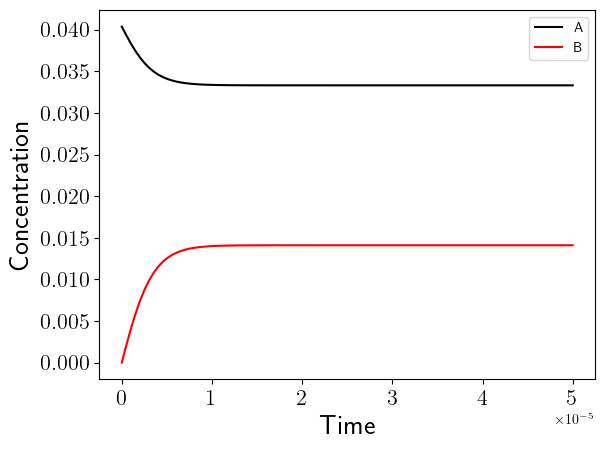

0.6823160186669504
0.31768398133304965
kp= 0.14791256431703337


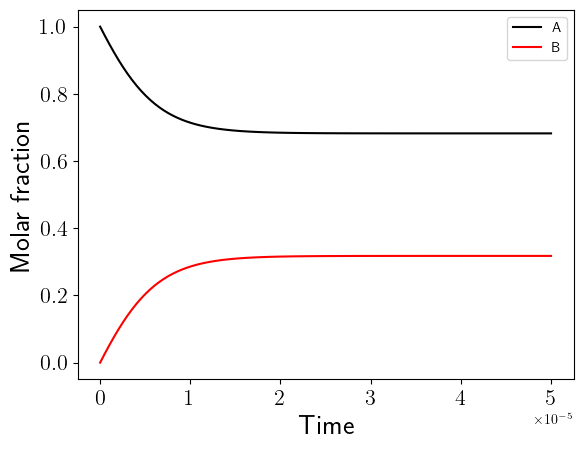

In [26]:
##Assuming b0=0 and a0=0.040355 M (=p0/(RT))
##a(t) = -q/(2p) + S/(2p) * (1 + K*exp(S*t)) / (1 - K*exp(S*t))
## K = (2*p*a0+q-S)/(2*p*a0+q+S)
## q = -(8*k2*a0+k1)
## p = 4*k2
## S = (k1*(16*a0*k2+k1))**0.5
import numpy as np
import matplotlib.pyplot as plt


def a(k1,k2,a0,t):
  q = -(8*k2*a0+k1)
  p = 4*k2
  S = (k1*(16*a0*k2+k1))**0.5
  K = (2*p*a0+q-S)/(2*p*a0+q+S)
  a = -q/(2*p) + S/(2*p) * (1 + K*np.exp(S*t)) / (1 - K*np.exp(S*t))
  return a

def b(k1,k2,a0,t):
  q = -(8*k2*a0+k1)
  p = 4*k2
  S = (k1*(16*a0*k2+k1))**0.5
  K = (2*p*a0+q-S)/(2*p*a0+q+S)
  a = -q/(2*p) + S/(2*p) * (1 + K*np.exp(S*t)) / (1 - K*np.exp(S*t))
  return 2*(a0-a)

t=np.linspace(0,0.00005,100)
k1 = 5.251e4
k2 = 8.796e6
#Keq= k1/k2=5.97e-3 (see the ms)
a0=0.0403599   # 1 mol in 24.78 L at p=p0=1 bar
tinf=5e-5

print(a(k1,k2,a0,tinf))
print(b(k1,k2,a0,tinf))

print("kc=",b(k1,k2,a0,tinf)*b(k1,k2,a0,tinf)/a(k1,k2,a0,tinf))
print(k1/k2)

#plt.rcParams['text.usetex'] = True

plt.plot(t,a(k1,k2,a0,t),color='black',label='A')
plt.plot(t,b(k1,k2,a0,t),color='red',label='B')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Concentration',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.legend()

plt.show()


#constant p case

def xa(k1,k2,a0,t):
  q = -(2*k2*a0+k1)
  #p is now 4*k2*p0/RT
  p = k2*a0
  S = (k1*(4*a0*k2+k1))**0.5
  K = (2*p+q-S)/(2*p+q+S)
  xa = -q/(2*p) + S/(2*p) * (1 + K*np.exp(S*t)) / (1 - K*np.exp(S*t))
  #a_p = 2*a0*xa/(1+xa)
  return xa

def xb(k1,k2,a0,t):
  q = -(2*k2*a0+k1)
  #p is now 4*k2*p0/RT
  p = k2*a0
  S = (k1*(4*a0*k2+k1))**0.5
  K = (2*p+q-S)/(2*p+q+S)
  xa = -q/(2*p) + S/(2*p) * (1 + K*np.exp(S*t)) / (1 - K*np.exp(S*t))
  #a_p = 2*a0*xa/(1+xa)
  return 1-xa



print(xa(k1,k2,a0,tinf))
print(xb(k1,k2,a0,tinf))

print("kp=",xb(k1,k2,a0,tinf)*xb(k1,k2,a0,tinf)/xa(k1,k2,a0,tinf))
#print(k1/k2)

#plt.rcParams['text.usetex'] = True

plt.plot(t,xa(k1,k2,a0,t),color='black',label='A')
plt.plot(t,xb(k1,k2,a0,t),color='red',label='B')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Molar fraction',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.legend()

plt.show()
